In [1]:
import random 
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

In [2]:
# x = random.sample(range(1, 50), 20)
# y = random.sample(range(50, 100), 20)
# data = list(zip(x, y))

df = pd.read_csv("a1.txt" , sep = ",", header=None)
#print(list(df.loc[:, 0]))
# print(list(df.iloc[:, 1]))
df.columns = ['x1']
#print(df.iloc[:,0])
# data = df.values.tolist()
# print(data)
df.shape

(3000, 1)

In [3]:
df[['x','y']] = df.x1.str.split(" ", expand = True)
df.drop(['x1'], axis=1, inplace = True)
df['x'].astype(int)
df['y'].astype(int)
df

,x,y
0,54620,43523
1,52694,42750
2,53253,43024
3,54925,42624
4,54973,43980
...,...,...
2995,11165,59822
2996,8828,59102
2997,8879,59244
2998,10002,61399


In [6]:
x = df.iloc[:,0]
#list(x)
x=np.array(list(x),dtype = int)
#print(x)
y= df.iloc[:,1]
y = np.array(list(y),dtype = int)
#print(y)
data = list(zip(x, y))

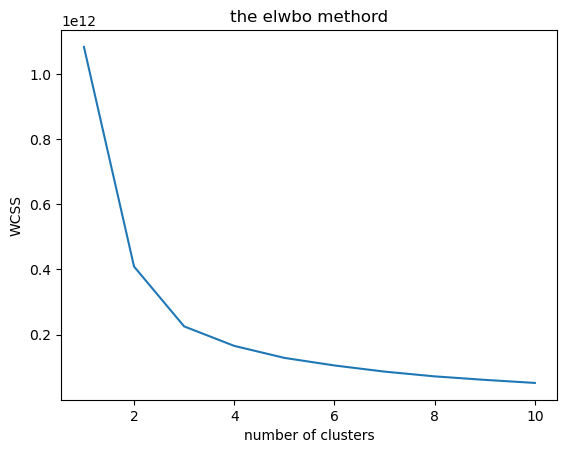

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans (n_clusters = i, init = 'k-means++' , max_iter = 300 , n_init = 10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("the elwbo methord")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()
# data = list(zip(x, y))

In [6]:
centroids = random.sample(data, 3)

In [7]:
def distance(x, y):
    return np.sqrt((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2)

while True:
    # Assign each data point to its closest centroid
    clusters = [[] for i in range(k)]
    for point in data:
        distances = [distance(point, c) for c in centroids]
        closest_centroid = distances.index(min(distances))
        clusters[closest_centroid].append(point)

    # Recalculate centroids as the mean of the points in each cluster
    new_centroids = []
    for cluster in clusters:
        if len(cluster) > 0:
            new_centroid = (sum([p[0] for p in cluster]) / len(cluster),
                            sum([p[1] for p in cluster]) / len(cluster))
            new_centroids.append(new_centroid)

    # Check if centroids have converged
    if set(new_centroids) == set(centroids):
        break
    else:
        centroids = new_centroids

C:\Users\acer\AppData\Local\Temp\ipykernel_17148\2584218937.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2)
C:\Users\acer\AppData\Local\Temp\ipykernel_17148\2584218937.py:2: RuntimeWarning: overflow encountered in long_scalars
  return np.sqrt((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2)


In [8]:
print("Final clusters:")
for i, cluster in enumerate(clusters):
    print(f"Cluster {i}: {cluster}")

Final clusters:
Cluster 0: [(44040, 46197), (42732, 45444), (43609, 46066), (44023, 46226), (44081, 47210), (43897, 46696), (43524, 46836), (42508, 47345), (43712, 46227), (44163, 47526), (42409, 44578), (43905, 45300), (42749, 45475), (43280, 46617), (43851, 47533), (42904, 44785), (43361, 48159), (43714, 43305), (43671, 47848), (43629, 46252), (42187, 44860), (42896, 46268), (42616, 48423), (42300, 46449), (44201, 48116), (43439, 43985), (42348, 46774), (41927, 48543), (41508, 47088), (42223, 47000), (44108, 46834), (43711, 47308), (43869, 48571), (43794, 43368), (42990, 47111), (43138, 47056), (44109, 47298), (42078, 45102), (43690, 44669), (43682, 47550), (41089, 45626), (41851, 44047), (43274, 47372), (42182, 45481), (43583, 47308), (43611, 45959), (42283, 44263), (37900, 43700), (38172, 42792), (38870, 44459), (36702, 45802), (39220, 45233), (39240, 45636), (38915, 45632), (37496, 46121), (37626, 43520), (36859, 42832), (36497, 45576), (37937, 43875), (37414, 45176), (39339, 4564

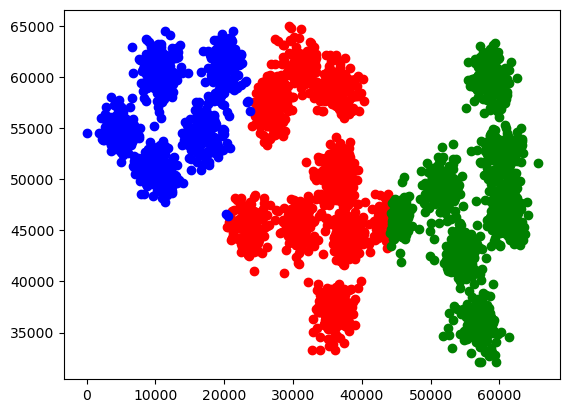

In [9]:
# Plot the clusters
colors = ['r', 'g', 'b']
for i, cluster in enumerate(clusters):
    for point in cluster:
        plt.scatter(point[0], point[1], c=colors[i])
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_17148\2689007195.py:40: RuntimeWarning: overflow encountered in long_scalars
  return np.sqrt((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2)
C:\Users\acer\AppData\Local\Temp\ipykernel_17148\2689007195.py:40: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2)


Final clusters:
Cluster 0: [(657985, 453405), (607463, 477085), (563460, 480559), (801539, 318482), (801667, 318542), (814045, 332998), (800479, 321640), (757470, 224976), (844536, 424646), (797105, 316002), (779956, 271501), (797205, 313318), (801323, 316240), (783666, 262902), (806131, 312752), (830658, 368694), (802482, 335269), (801910, 325434), (808062, 337340), (789833, 304422), (803603, 327255), (800865, 312968), (802237, 318526), (803959, 315173), (800123, 312312), (780927, 285057), (797242, 324588), (801551, 320544), (809182, 319115), (801931, 317202), (820327, 352701), (801093, 317509), (798523, 324500), (805237, 318655), (803375, 311620), (801441, 323812), (797313, 317527), (788220, 301915), (790395, 300024), (817135, 349925), (797787, 301470), (804630, 332333), (808710, 330379), (802111, 320817), (796375, 309563), (819768, 346596), (814605, 354382), (800565, 319364), (802089, 313456), (814401, 341234), (796609, 319691), (776131, 248465), (803464, 329093), (802646, 317894), 

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ''

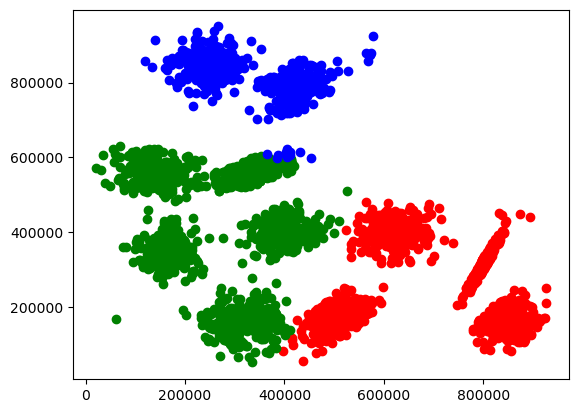

In [10]:
import random 
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

# x = random.sample(range(1, 50), 20)
# y = random.sample(range(50, 100), 20)
# data = list(zip(x, y))

df = pd.read_csv("s1.txt" , sep = ",", header=None)
#print(list(df.loc[:, 0]))
# print(list(df.iloc[:, 1]))
df.columns = ['x1']
#print(df.iloc[:,0])
# data = df.values.tolist()
# print(data)
#df

df[['x',"y"]] = df.x1.str.split(" ", expand = True)
df.drop(['x1'], axis=1, inplace = True)
df['x'].astype(int)
df['y'].astype(int)
#df

x = df.iloc[:,0]
#list(x)
x=np.array(list(x),dtype = int)
#print(x)
y= df.iloc[:,1]
y = np.array(list(y),dtype = int)
#print(y)
data = list(zip(x, y))

# data = list(zip(x, y))
k = 5
centroids = random.sample(data, k)

def distance(x, y):
    return np.sqrt((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2)

while True:
    # Assign each data point to its closest centroid
    clusters = [[] for i in range(k)]
    for point in data:
        distances = [distance(point, c) for c in centroids]
        closest_centroid = distances.index(min(distances))
        clusters[closest_centroid].append(point)

    # Recalculate centroids as the mean of the points in each cluster
    new_centroids = []
    for cluster in clusters:
        if len(cluster) > 0:
            new_centroid = (sum([p[0] for p in cluster]) / len(cluster),
                            sum([p[1] for p in cluster]) / len(cluster))
            new_centroids.append(new_centroid)

    # Check if centroids have converged
    if set(new_centroids) == set(centroids):
        break
    else:
        centroids = new_centroids

print("Final clusters:")
for i, cluster in enumerate(clusters):
    print(f"Cluster {i}: {cluster}")

# Plot the clusters
colors = ['r', 'g', 'b','']
for i, cluster in enumerate(clusters):
    for point in cluster:
        plt.scatter(point[0], point[1], c=colors[i])
plt.show()